### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### Importing the dataset

In [2]:
dataset= pd.read_csv("Data_MFR_310.csv")

In [3]:
## print the top5 records
dataset.head()

,Unnamed: 0,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv,MFR
0,04-05-2018 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-2018 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-2018 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-2018 01:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-2018 03:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


# Exploratory Data Analysis

In [4]:
# the data coloumn is not useful
#deleting coloumn
dataset=dataset.drop(dataset.columns[0],axis='columns')

In [5]:
dataset.head()

,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv,MFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


In [6]:
# printing info of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 8 columns):
513FC31103.pv      2486 non-null float64
513HC31114-5.mv    2560 non-null float64
513PC31201.pv      2484 non-null float64
513LC31202.pv      2484 non-null float64
513FC31409.pv      2484 non-null float64
513FC31114-5.pv    2486 non-null float64
513TC31220.pv      2484 non-null float64
MFR                2564 non-null float64
dtypes: float64(8)
memory usage: 160.4 KB


## Handling null vlaues

In [7]:
dataset.isnull().sum()

513FC31103.pv      78
513HC31114-5.mv     4
513PC31201.pv      80
513LC31202.pv      80
513FC31409.pv      80
513FC31114-5.pv    78
513TC31220.pv      80
MFR                 0
dtype: int64

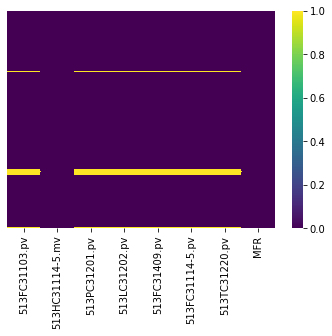

In [8]:
# checking null values by using heatmap
sns.heatmap(dataset.isnull(),yticklabels=False,cmap='viridis')

### As we can see that the missing values are from same rows and different columns

#### droping the rows that contains null values

In [9]:
dataset=dataset.dropna()

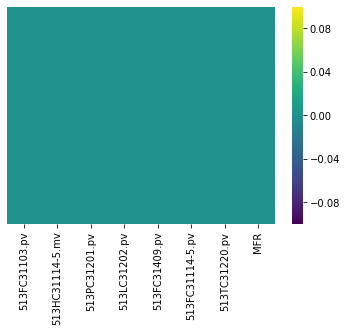

In [10]:
#checking for null values
sns.heatmap(dataset.isnull(),yticklabels=False,cmap='viridis')

### Making scatterplot of all independent variable with respect to target variable

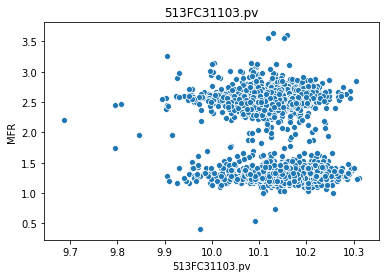

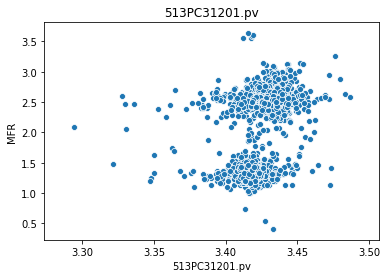

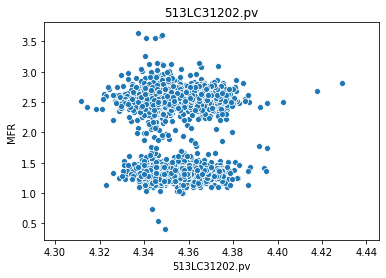

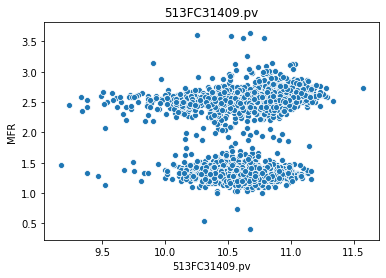

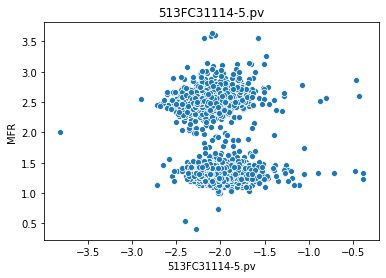

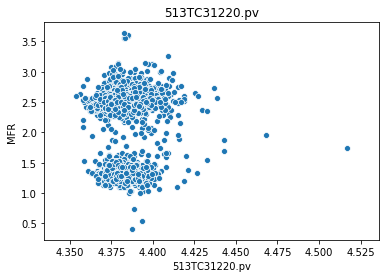

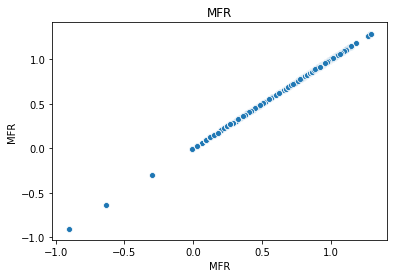

In [15]:
## We will be using logarithmic transformation


for feature in dataset:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['MFR']=np.log(data['MFR'])
        sns.scatterplot(data[feature],data['MFR'])
        plt.xlabel(feature)
        plt.ylabel('MFR')
        plt.title(feature)
        plt.show()

In [16]:
#splitting data 
x=dataset.drop('MFR',axis=1)
y=dataset['MFR']

## Lets analyse the continuous values by creating histograms to understand the distribution

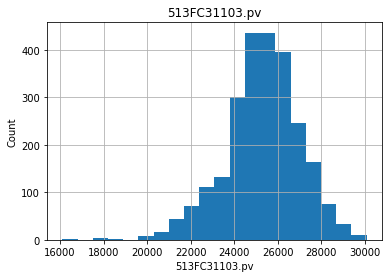

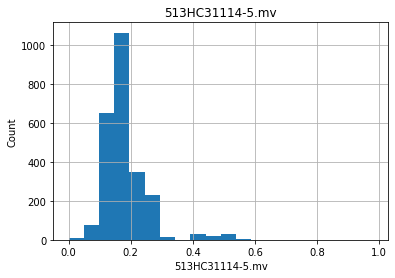

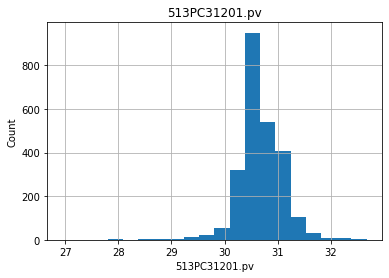

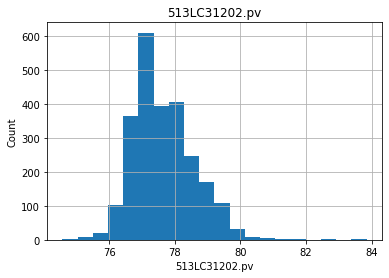

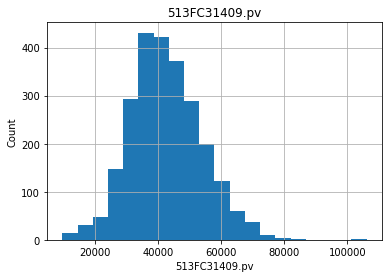

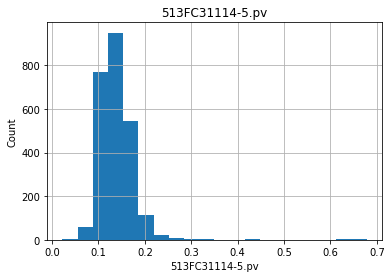

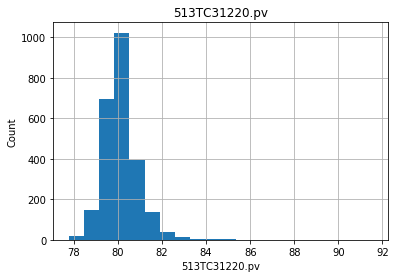

In [17]:

for feature in x:
    data=dataset.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


### from the above plots we can see that the data have normal distribution

## checking for outliers

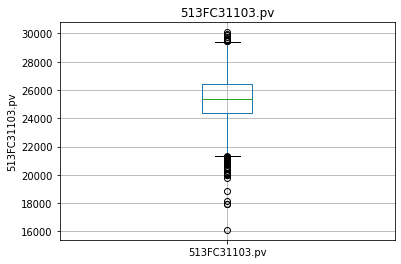

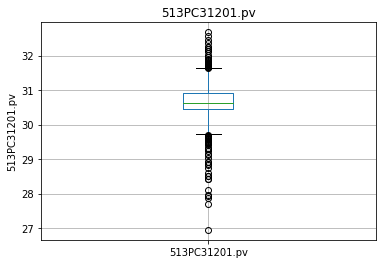

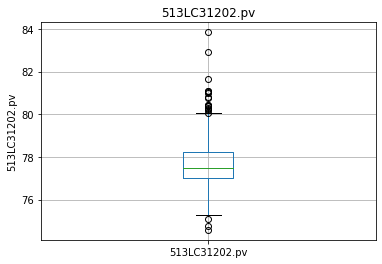

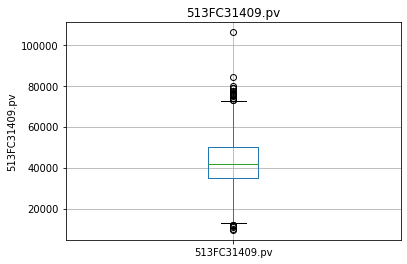

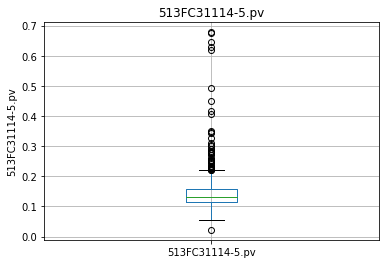

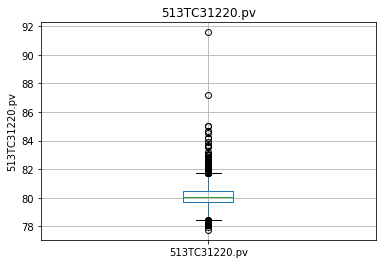

In [18]:
for feature in x:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=data[feature]
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        
    

# removing outliers

In [19]:
from scipy import stats
z= np.abs(stats.zscore(data))
print(z)

[[0.26273019 0.42590012 0.58798513 ... 0.60828028 0.30998733 0.9135353 ]
 [0.13629161 0.42590012 0.32269669 ... 0.20972067 1.55824061 0.95294074]
 [0.22540683 0.42590012 0.72656423 ... 0.27416357 1.61072253 0.95294074]
 ...
 [3.0802972  0.91869869 0.94038491 ... 1.05617656 0.7528853  0.66268252]
 [2.52148343 0.01767887 6.61289565 ... 0.02413806 4.32570514 1.07643969]
 [0.50812063 0.01767887 0.85579153 ... 0.82518188 1.99056261 0.84000702]]


In [20]:
threshold=2
print(np.where(z>2))

(array([   0,    9,   13,   17,   17,   20,   21,   21,   24,   30,   38,
         40,   41,   42,   44,   45,   46,   47,   50,   56,   60,   60,
         61,   63,   67,   69,   70,   71,   73,   74,   75,   76,   77,
         80,   94,   96,   97,   98,  100,  102,  105,  115,  116,  124,
        128,  132,  132,  132,  141,  144,  154,  155,  156,  156,  156,
        168,  172,  174,  176,  181,  185,  191,  196,  198,  199,  212,
        213,  217,  222,  227,  235,  238,  240,  245,  261,  275,  275,
        289,  292,  302,  308,  309,  310,  311,  312,  332,  349,  357,
        362,  362,  363,  367,  367,  368,  369,  369,  369,  370,  371,
        371,  372,  372,  372,  373,  374,  375,  375,  376,  376,  377,
        377,  377,  378,  379,  380,  381,  382,  383,  384,  385,  386,
        387,  387,  387,  388,  388,  388,  388,  389,  390,  391,  391,
        392,  393,  394,  409,  414,  415,  415,  415,  417,  417,  418,
        419,  420,  421,  422,  423,  424,  425,  

In [21]:
q1=dataset.quantile(0.25)
q3=dataset.quantile(0.75)
IQR =q3-q1
print(IQR)

513FC31103.pv       2035.949750
513HC31114-5.mv        0.062000
513PC31201.pv          0.479609
513LC31202.pv          1.218716
513FC31409.pv      15214.760000
513FC31114-5.pv        0.043272
513TC31220.pv          0.818838
MFR                    9.100000
dtype: float64


In [22]:
data=dataset[(z<3).all(axis=1)]

In [23]:
q1=dataset.quantile(0.25)
q3=dataset.quantile(0.75)
IQR =q3-q1
print(IQR)

data=data[~((data<(q1-1.5*IQR))|(data>(q3+1.5*IQR))).any(axis=1)]

513FC31103.pv       2035.949750
513HC31114-5.mv        0.062000
513PC31201.pv          0.479609
513LC31202.pv          1.218716
513FC31409.pv      15214.760000
513FC31114-5.pv        0.043272
513TC31220.pv          0.818838
MFR                    9.100000
dtype: float64


## again checking for outliers

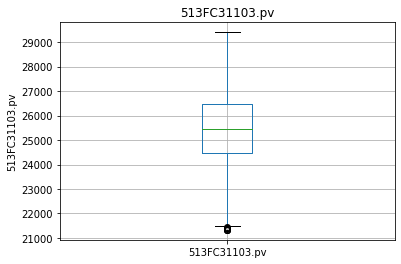

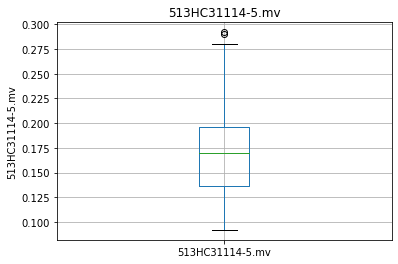

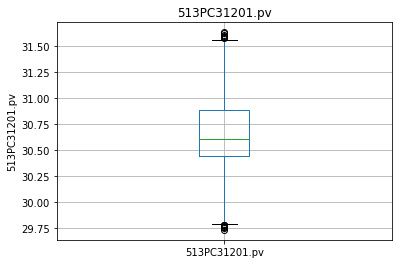

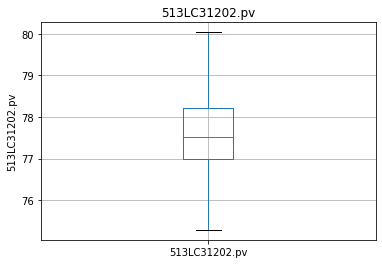

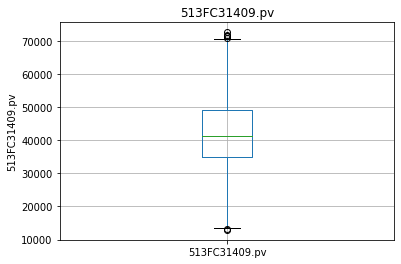

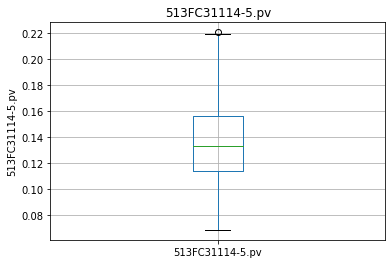

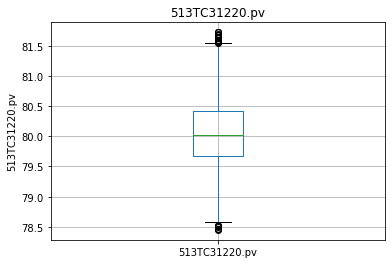

In [24]:
for feature in x:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=data[feature]
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        
    

## splitting final data into independent and dependent variable

In [25]:
x=data.drop('MFR',axis=1)

In [26]:
y=data['MFR']

# Feature Selection

## Finding correlation 

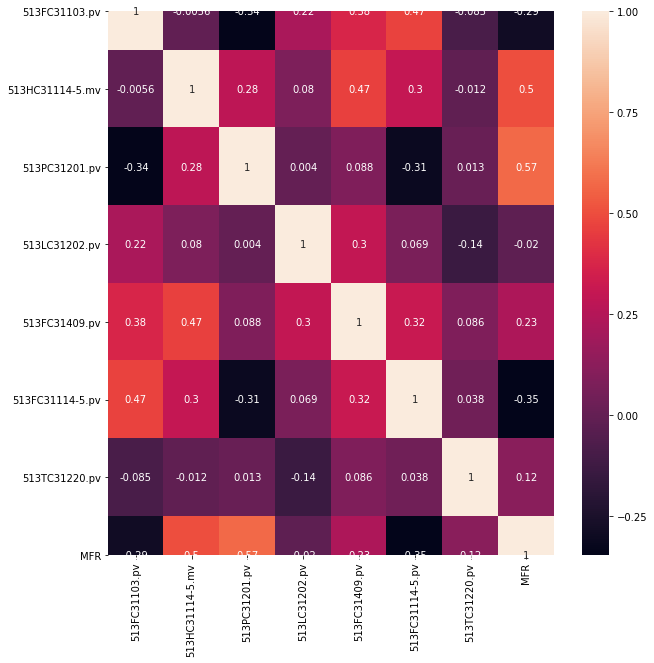

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

## Finding best features

In [29]:
# importing libraries
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [30]:
### Apply Feature Selection
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x, y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [31]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

### from above we can see that all the features are important so we are not droping any feature

## splitting data into train and test 

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=66)

#  Applying Grid Search to find  the best parameters for Random Forest Regressor

In [37]:
#importing library
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [38]:
grid_prm= { 'n_estimators':[100,105,110],
           'criterion':['mse'],
           'max_depth':[1,2,3,4,5],
            'min_samples_leaf':[1,2,3]}

In [39]:
grid= GridSearchCV(param_grid=grid_prm,estimator=regressor,cv=10,verbose=1,n_jobs=-1)

### evaluating the model

In [40]:
grid_search = grid.fit(X_train, y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.2min finished


### checking best accuracy and best parameter

In [41]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("best_accuracy = {} and best params = {} ".format(best_accuracy,best_parameters))

best_accuracy = 0.7261931952467936 and best params = {'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 110} 


# Applying Random Forest Regressor with its best params

In [42]:
regressor = RandomForestRegressor(n_estimators= 100, criterion = 'mse', max_depth = 5, min_samples_leaf = 3, random_state=6666)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=6666,
                      verbose=0, warm_start=False)

## making prediction

In [43]:
y_pred = regressor.predict(X_test)

## checking r2_score

In [44]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.7452176781697369